
# Non-Parametric Density Estimation

Let's get some quick practice with your new skills, you will be asked some basic questions about some hand-written adult income data

Standard scientific Python imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import datasets, classifiers and performance metrics


In [3]:
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split


The adult dataset

In [4]:
data = pd.read_csv('adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
from numpy import nan
df = data.replace("?", nan)

In [9]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns = ['null'])

null_values['percent'] = null_values['null'] / len(df)
round(null_values * 100, 3).sort_values('percent', ascending = False)

,null,percent
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


#### fill nan number

In [10]:
df['native-country'].fillna(df['native-country'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)

In [11]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns = ['null'])
null_values['percent'] = null_values['null'] / len(df)
round(null_values * 100, 3).sort_values('percent', ascending = False)

,null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Data processing

#### educational-num seems to be not so important

In [12]:
df = df.drop(["educational-num"], axis = 1)

#### also fnlwgt is not so important

In [13]:
df = df.drop(["fnlwgt"], axis = 1)

creat label

In [15]:
df.income = [1 if each == '>50K' else 0 for each in data.income]
y = df.income
y.head(10)

0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: income, dtype: int64

As you can see i got labels as y and encoded them if bigger than 50K to 1 else 0.

In [16]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']].apply(le.fit_transform)

In [19]:
df.drop(['income'],axis = 1).head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8,3,1,4,6,3,2,1,0,0,39,38
1,21,3,11,2,4,0,4,1,0,0,49,38
2,11,1,7,2,10,0,4,1,0,0,39,38
3,27,3,15,2,6,0,2,1,98,0,39,38
4,1,3,15,4,9,3,4,0,0,0,29,38


Split data into train and test subsets

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)

## KNeighborsClassifier

Using adult data, Train a KNN Classifier and draw the confusion matrix according to the code.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
disp = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % disp)


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11233
           1       0.76      0.71      0.73      3420

    accuracy                           0.88     14653
   macro avg       0.84      0.82      0.83     14653
weighted avg       0.88      0.88      0.88     14653


Confusion matrix:
[[10473   760]
 [  996  2424]]


#### Train the classifier for different K,

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report for classifier %s: \n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
disp = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n%s" % disp)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'): 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11233
           1       0.81      0.64      0.71      3420

    accuracy                           0.88     14653
   macro avg       0.85      0.80      0.82     14653
weighted avg       0.88      0.88      0.88     14653


Confusion matrix: 
[[10710   523]
 [ 1228  2192]]


In [27]:
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

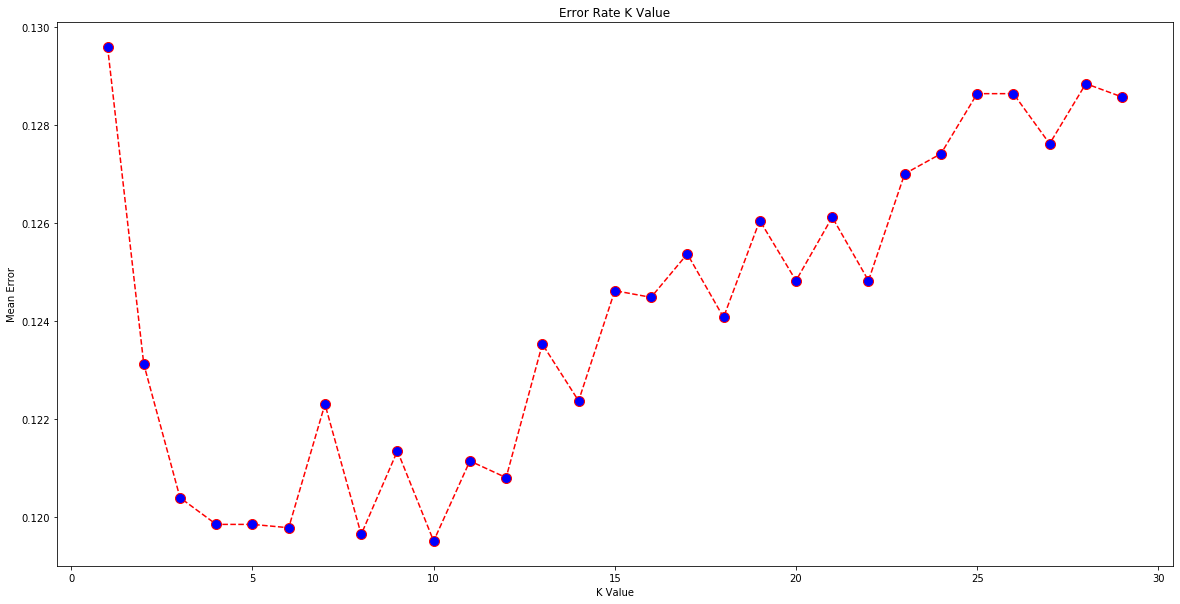

In [33]:
plt.figure(figsize = (20, 10))
plt.plot(range(1, 30), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Parzen

#### now train a kernerDensity model with diffrent kernels,

## Decision Tree

#### train a decision tree model with find its accuracy

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy :", 100 * metrics.accuracy_score(y_test, y_pred))

Accuracy : 100.0


#### Now change the model parameters to optimize it.

In [35]:
clf = tree.DecisionTreeClassifier(min_samples_split = 30 , min_samples_leaf = 2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy :", 100 * metrics.accuracy_score(y_test, y_pred))

Accuracy : 100.0


### Boosting

#### train a Boosting model for diffrrent max depth and different learning rate and find its accuracy for validation set 

In [37]:
gb_clf = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.3, max_features = 2, max_depth = 5, random_state = 7)
gb_clf.fit(X_train, y_train)
print("Learning rate :", 0.3)
print("max_depth :", max_depth)
print("Accuracy score (training) : {0:.3f}".format(100 * gb_clf.score(X_train, y_train)))
print("Accuracy score (validation) : {0:.3f}".format(100 * gb_clf.score(X_test, y_test)))

Learning rate : 0.3


NameError: name 'max_depth' is not defined

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.1, max_features = 2, max_depth = 3, random_state = 7)
gb_clf.fit(X_train, y_train)
print("Learning rate :", learning_rate)
print("max_depth :", max_depth)
print("Accuracy score (training) : {0:.3f}".format(100 * gb_clf.score(X_train, y_train)))
print("Accuracy score (validation) : {0:.3f}".format(100 * gb_clf.score(X_test, y_test)))